In [2]:
!pwd

/Users/jan/Documents/Studia/Magisterka/analysis


# Graph measures for every subject and condition

In [536]:
import networkx
import bct
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

from nilearn import datasets
from nilearn import maskers
from nilearn import image
from nilearn import input_data
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
import seaborn as sns
import scipy
import statsmodels


sys.path.append("..")
sys.path.append("/Users/jan/Documents/Studia/Magisterka/analysis")

In [274]:
one_back_corr_thr = np.load('correlation_matrices/one_back_corr_thr.npy')
two_back_corr_thr = np.load('correlation_matrices/two_back_corr_thr.npy')
rest_corr_thr = np.load('correlation_matrices/rest_corr_thr.npy')

In [170]:
one_back_corr_bin = np.load('correlation_matrices/one_back_corr_binarized.npy')
two_back_corr_bin = np.load('correlation_matrices/two_back_corr_binarized.npy')
rest_corr_bin = np.load('correlation_matrices/rest_corr_binarized.npy')

In [98]:
one_back_corr_bin_50 = np.load('correlation_matrices/one_back_corr_binarized_50.npy')
two_back_corr_bin_50 = np.load('correlation_matrices/two_back_corr_binarized_50.npy')
rest_corr_bin_50 = np.load('correlation_matrices/rest_corr_binarized_50.npy')

In [410]:
regions = pd.read_csv('atlases/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')

In [47]:
subs = np.load('subs_good.npy')

In [48]:
rest_corr_bin.shape

(40, 100, 100)

In [412]:
dmn_rows = regions[regions['ROI Name'].str.contains('Default')]

In [811]:
dmn_indexes = dmn_rows.index.to_list()
dmn_indexes

[37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [490]:
dmn_rows_list = dmn_rows['ROI Name'].to_list()

In [501]:
for reg in range(24):
    dmn_rows_list[reg] = dmn_rows_list[reg][10:]

In [502]:
dmn_rows_list

['LH_Default_Temp_1',
 'LH_Default_Temp_2',
 'LH_Default_Par_1',
 'LH_Default_Par_2',
 'LH_Default_PFC_1',
 'LH_Default_PFC_2',
 'LH_Default_PFC_3',
 'LH_Default_PFC_4',
 'LH_Default_PFC_5',
 'LH_Default_PFC_6',
 'LH_Default_PFC_7',
 'LH_Default_pCunPCC_1',
 'LH_Default_pCunPCC_2',
 'RH_Default_Par_1',
 'RH_Default_Temp_1',
 'RH_Default_Temp_2',
 'RH_Default_Temp_3',
 'RH_Default_PFCv_1',
 'RH_Default_PFCv_2',
 'RH_Default_PFCdPFCm_1',
 'RH_Default_PFCdPFCm_2',
 'RH_Default_PFCdPFCm_3',
 'RH_Default_pCunPCC_1',
 'RH_Default_pCunPCC_2']

# Extracting DMN vectors

In [455]:
dmn_rest = np.empty((40, 24, 100))
dmn_one = np.empty((40, 24, 100))
dmn_two = np.empty((40, 24, 100))

for sub in range(subs.shape[0]):
    for idx in range(len(dmn_indexes)):
            dmn_rest[sub][idx] = rest_corr_bin[sub][dmn_indexes[idx]]
            dmn_one[sub][idx] = one_back_corr_bin[sub][dmn_indexes[idx]]
            dmn_two[sub][idx] = two_back_corr_bin[sub][dmn_indexes[idx]]

In [457]:
dmn_rest[0][10] #this is a connectivity vector of the first subject of the first of the dmn components

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [431]:
dmn_rest.shape[1]

24

# Cosine distance

In [427]:
from scipy.spatial.distance import cosine

In [428]:
def cos_dist_conds(rest, one_back, two_back):
    cos_dist1 = cosine(rest, one_back)
    cos_dist2 = cosine(rest, two_back)
    cos_dist3 = cosine(one_back, two_back)

    return cos_dist1, cos_dist2, cos_dist3
    

In [558]:

dmn_cos_rest_one = np.empty((40,24))
dmn_cos_rest_two = np.empty((40,24))
dmn_cos_one_two = np.empty((40,24))
dmn_cos_rest_rest = np.empty((40,24))
for sub in range(subs.shape[0]):
    for comp in range(dmn_rest.shape[1]):
        dmn_cos_rest_one[sub][comp] = cosine(dmn_rest[sub][comp], dmn_one[sub][comp])
        dmn_cos_rest_two[sub][comp] = cosine(dmn_rest[sub][comp], dmn_two[sub][comp])
        dmn_cos_one_two[sub][comp] = cosine(dmn_one[sub][comp], dmn_two[sub][comp])
        dmn_cos_rest_rest[sub][comp] = cosine(dmn_rest[sub][comp], dmn_rest[sub][comp])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/spatial/distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [548]:
dmn_cos_rest_one[:,0]

array([0.75999232, 0.62203553, 0.45445527, 0.65184469, 0.43955146,
       0.71416902, 0.75746437, 0.54773298, 0.69848866, 0.        ,
       0.65315601, 0.        , 0.31359353, 0.47295372, 0.81742581,
       0.82592234, 0.73888352, 0.55525041, 0.7763932 , 0.77777778,
       0.42264973, 0.47376519, 0.42264973, 0.75746437, 1.        ,
       0.21118936, 0.39313392, 0.61466268, 0.3649147 , 0.4023857 ,
       0.36489265, 0.52859548, 0.42145809, 0.40655757, 0.75381702,
       0.52565835, 0.        , 0.71132487, 0.50763404, 0.46547752])

## Average cosine distances

In [555]:
scipy.stats.t.interval(0.99, loc=np.mean(dmn_cos_rest_one[:,0]), df=len(dmn_cos_rest_one[:,0])-1, scale=scipy.stats.sem(dmn_cos_rest_one[:,0]))

(0.4347199015391132, 0.6315461784008889)

In [ ]:
centralne twierdzenie graniczne - wyjaśnienie założenia, jak nie t test to wilkokson albo umann whitney, ewentualnie podzielić rest vs rest; mi edzy warunkami nie ma różnicy, czyli cos 0 - t test dla 1 sample , centralne twierdzenie graniczne 

In [580]:
dmn_cos_rest_one.shape

(40, 24)

In [597]:
t_dmn_rest_one = np.empty(24, dtype='object')
t_dmn_rest_two = np.empty(24, dtype='object')
t_dmn_one_two = np.empty(24, dtype='object')
for reg in range(dmn_cos_rest_one.shape[1]):
    t_dmn_rest_one[reg] = scipy.stats.ttest_1samp(dmn_cos_rest_one[:,reg], 0)
    t_dmn_rest_two[reg] = scipy.stats.ttest_1samp(dmn_cos_rest_two[:,reg], 0)
    t_dmn_one_two[reg] = scipy.stats.ttest_1samp(dmn_cos_one_two[:,reg], 0)

In [606]:
t_dmn_one_two[1][0]

16.148800609996098

In [603]:
t_dmn_rest_two[0]

TtestResult(statistic=20.97756067877674, pvalue=7.573911361278871e-23, df=39)

In [601]:
conditions = ['rest vs 1-back', 'rest vs 2-back', '1-back vs 2-back']

In [ ]:
frameon : bool, default: :rc:`legend.frameon`
    Whether the legend should be drawn on a patch (frame).

fancybox : bool, default: :rc:`legend.fancybox`
    Whether round edges should be enabled around the `.FancyBboxPatch` which
    makes up the legend's background.

shadow : bool, default: :rc:`legend.shadow`
    Whether to draw a shadow behind the legend.

framealpha : float, default: :rc:`legend.framealpha`
    The alpha transparency of the legend's background.
    If *shadow* is activated and *framealpha* is ``None``, the default value is
    ignored.

facecolor : "inherit" or color, default: :rc:`legend.facecolor`
    The legend's background color.
    If ``"inherit"``, use :rc:`axes.facecolor`.

edgecolor : "inherit" or color, default: :rc:`legend.edgecolor`
    The legend's background patch edge color.
    If ``"inherit"``, use take :rc:`axes.edgecolor`.

mode : {"expand", None}
    If *mode* is set to ``"expand"`` the legend will be horizontally
    expanded to fill the axes area (or *bbox_to_anchor* if defines
    the legend's size).

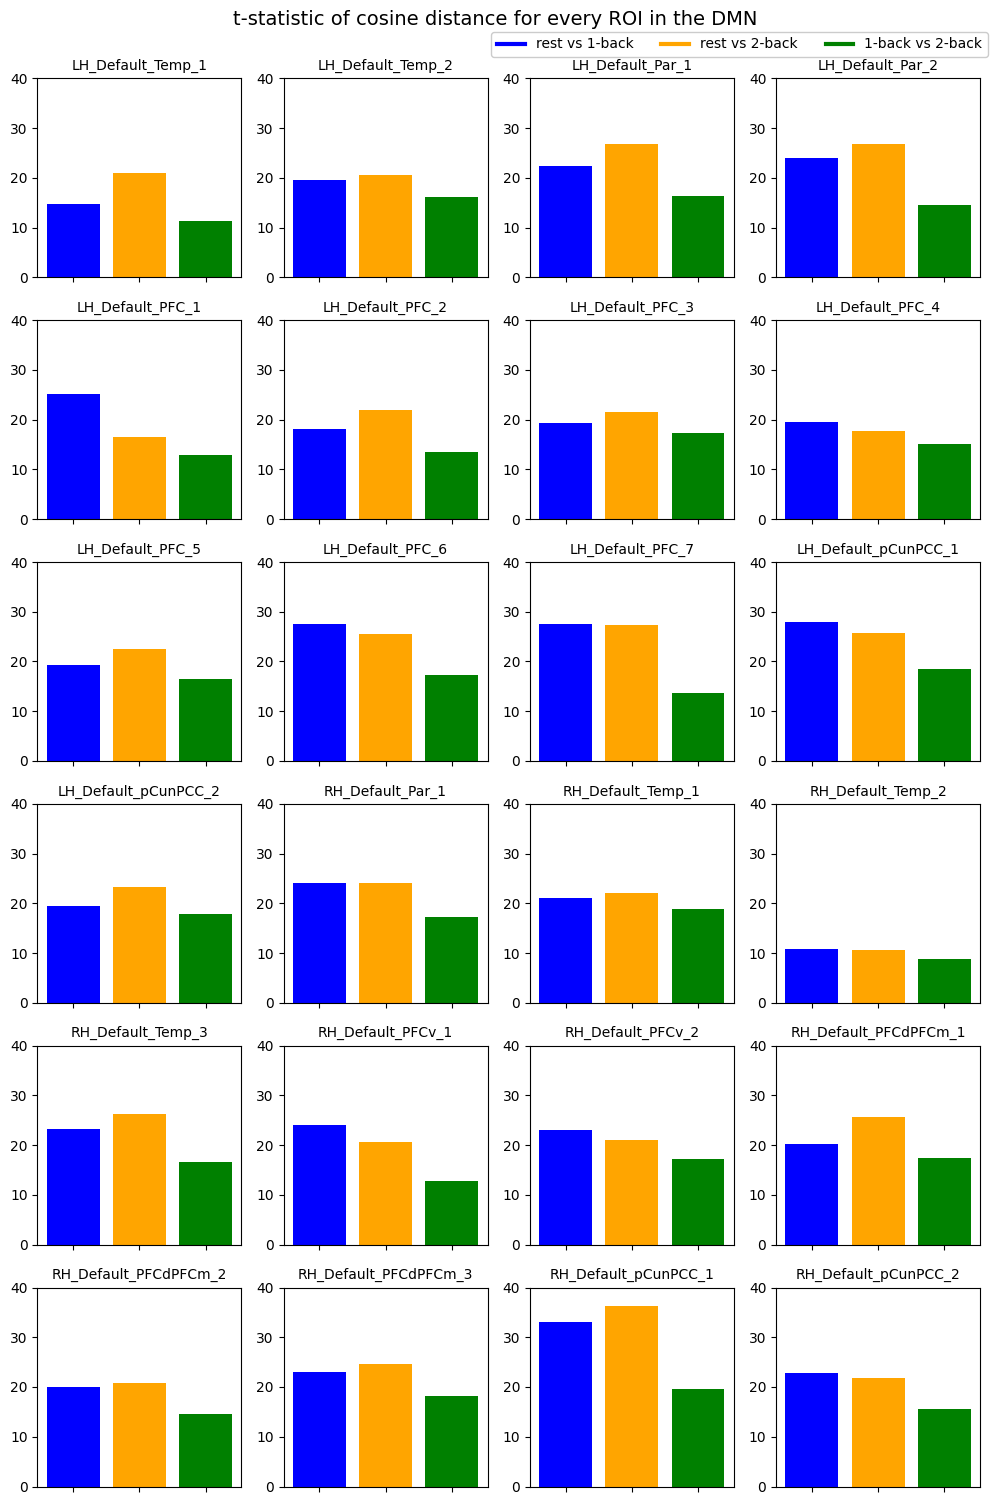

In [678]:
# Create a figure and axis array with 24 subplots
fig, axs = plt.subplots(6, 4, figsize=(10, 15))  # 4 rows, 6 columns

# Plot something in each subplot (dummy example)
# for reg in range(dmn_cos_rest_one.shape[1]):
for i, ax in enumerate(axs.flat):
    reg = i
    ax.bar(conditions, height=[t_dmn_rest_one[reg][0], t_dmn_rest_two[reg][0], t_dmn_one_two[reg][0]], color=['blue','orange','green'], width=0.8)  # Replace with your actual data or plot
    ax.set_ylim(0, 40)
        # Add titles to subplots
    ax.set_title(dmn_rows_list[i], fontsize='medium')
    ax.set_xticklabels([], rotation=30, fontsize='small')
    
# Adjust layout to prevent overlapping
legend_colors = ['blue','orange','green']
handles = [plt.Line2D([0], [0], color=color, linewidth=3, linestyle='-') for color in legend_colors]

# Create the legend with specified labels and colors
fig.legend(handles, conditions, loc='upper right', bbox_to_anchor=(1, 0.99), framealpha=1, ncols = 3)
fig.suptitle('t-statistic of cosine distance for every ROI in the DMN', fontsize=14, y=1)
plt.tight_layout()

plt.savefig('cosine_distances')
# Show the plot
plt.show()

<BarContainer object of 3 artists>

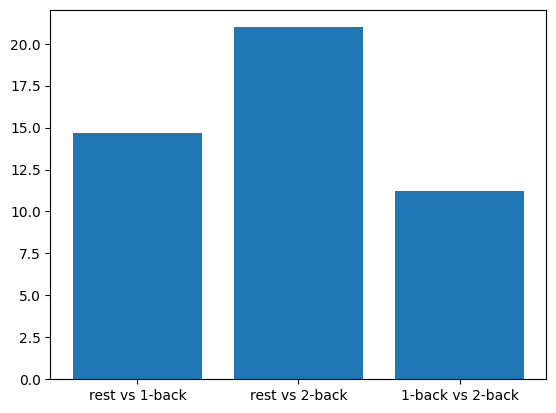

In [598]:
plt.bar(['rest vs 1-back', 'rest vs 2-back', '1-back vs 2-back'],height=[t_dmn_rest_one[0][0], t_dmn_rest_two[0][0], t_dmn_one_two[0][0]])

In [477]:
dmn_avg_cos_rest_one = np.mean(dmn_cos_rest_one, axis=0)
dmn_avg_cos_rest_two = np.mean(dmn_cos_rest_two, axis=0)
dmn_avg_cos_one_two = np.mean(dmn_cos_one_two, axis=0)

In [556]:
dmn_avg_cos_rest_one.shape

0.470269821900184

In [482]:
dmn_avg_cos_rest_two

array([0.61739913, 0.57340567, 0.45636268, 0.44018941, 0.50391319,
       0.47640661, 0.50571896, 0.51460556, 0.4683348 , 0.46955041,
       0.52650389, 0.53647982, 0.47109676, 0.41376683, 0.57220986,
       0.45432267, 0.50303675, 0.49733359, 0.4665129 , 0.51403172,
       0.4549249 , 0.48550364, 0.52108516, 0.46102843])

In [483]:
dmn_avg_cos_one_two

array([0.4251801 , 0.42252476, 0.33779516, 0.27512879, 0.3976504 ,
       0.34310428, 0.36449893, 0.37637454, 0.34214902, 0.28313023,
       0.3466292 , 0.34696425, 0.34358108, 0.26868534, 0.39588845,
       0.35755469, 0.31338528, 0.36975825, 0.35982955, 0.4177554 ,
       0.33628404, 0.27119655, 0.34463138, 0.32437851])

!!!PAMIĘTAĆ ŻE WARTOŚCI SA POSORTOWANE!!!

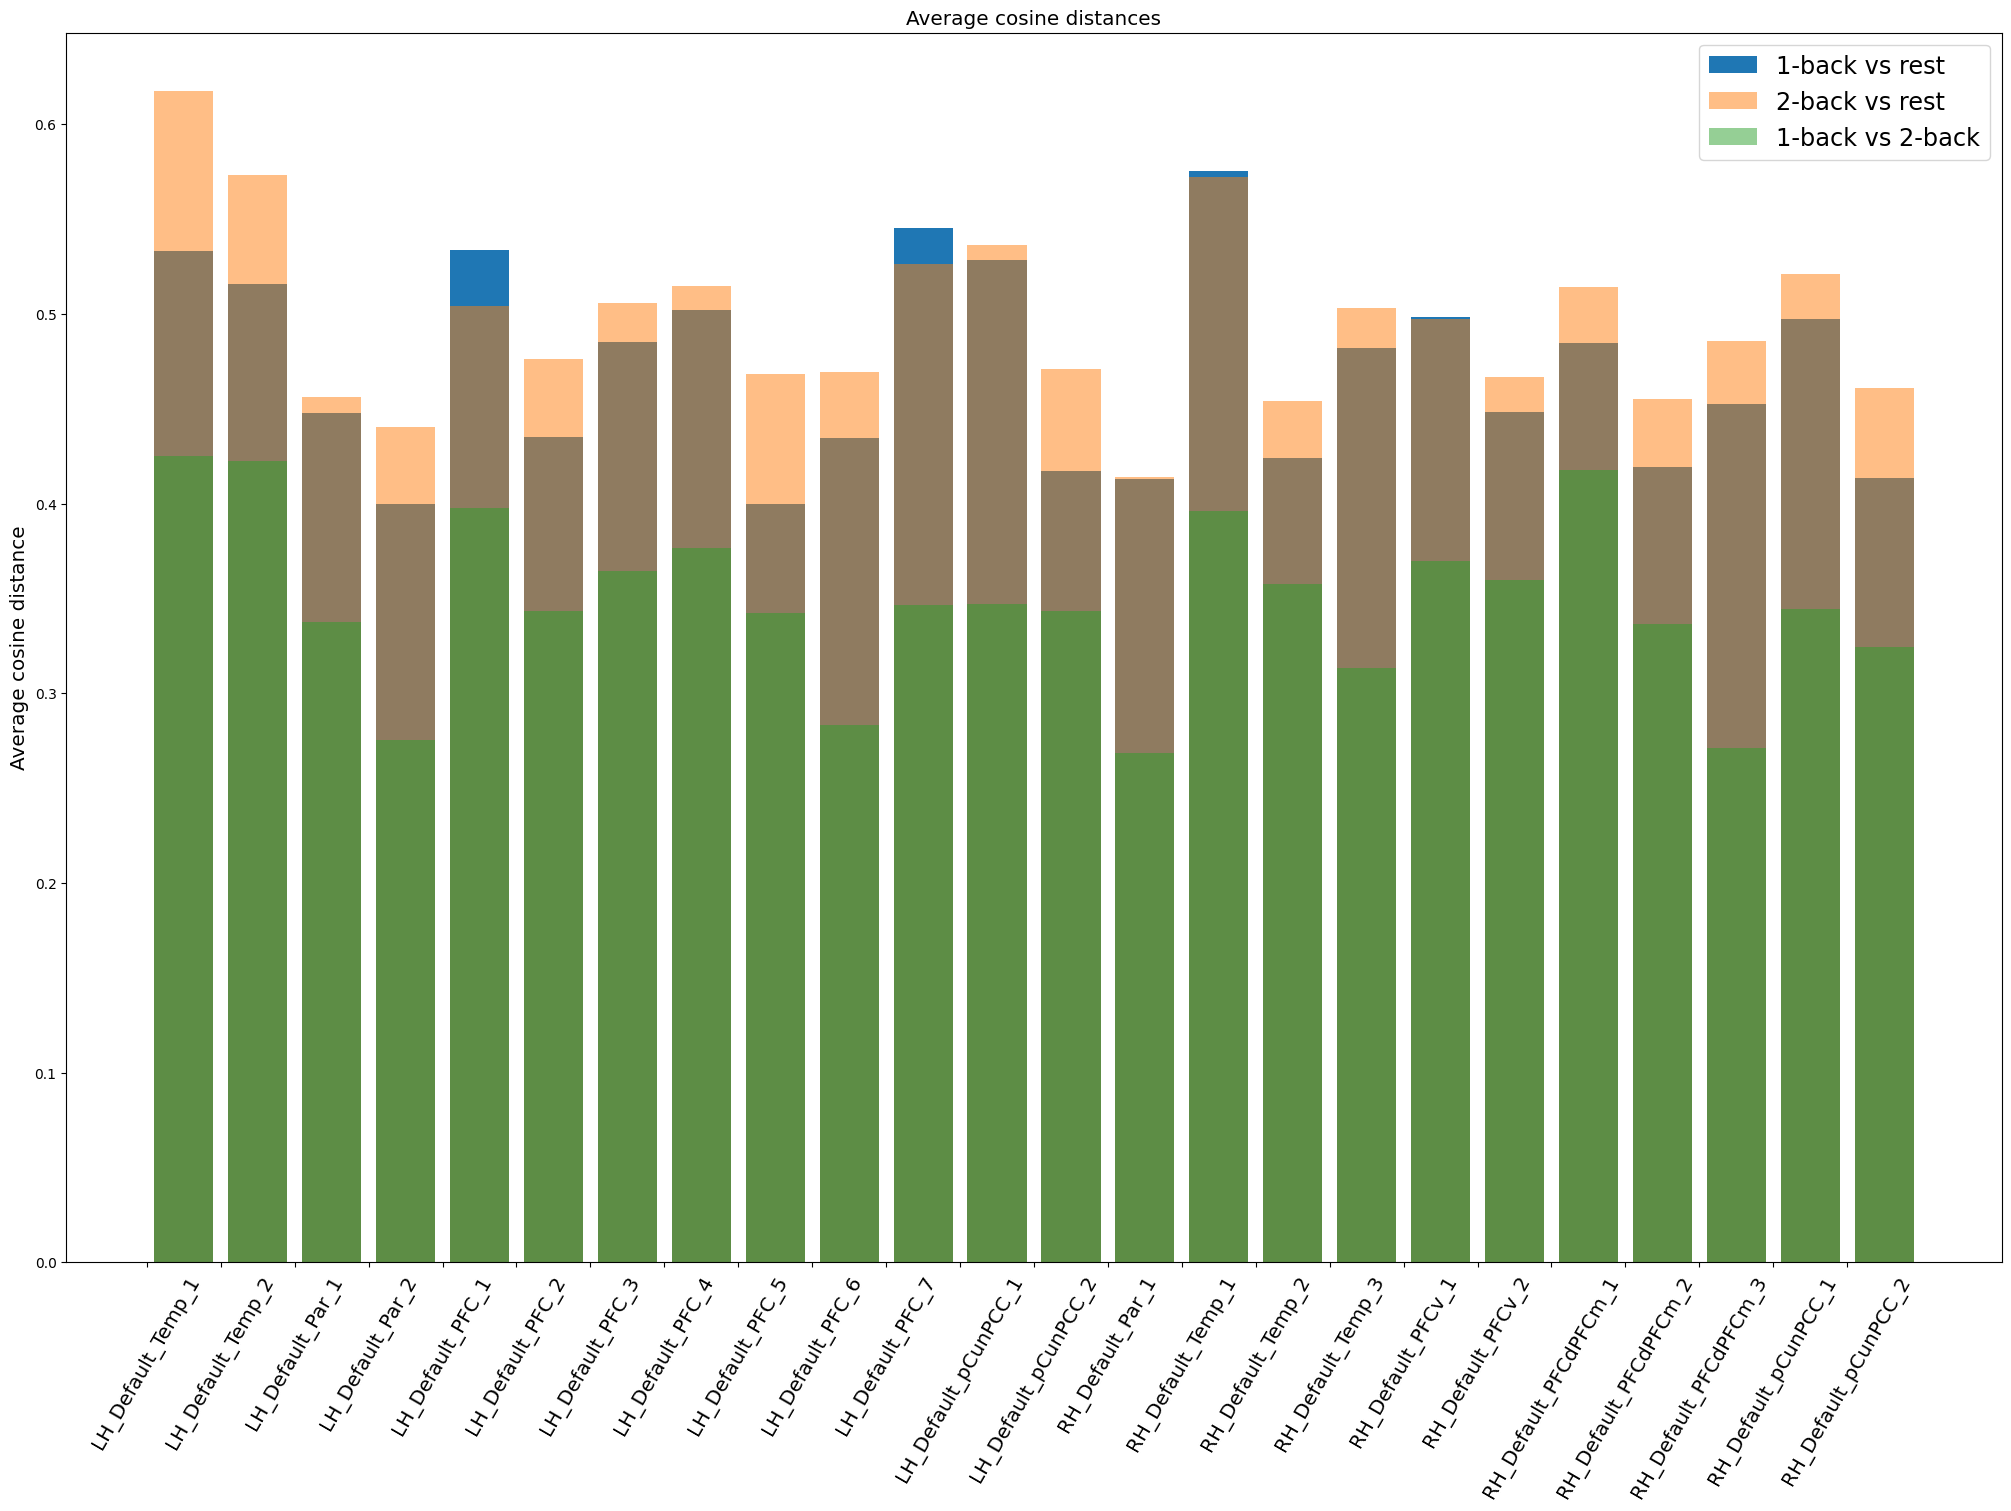

In [658]:
plt.figure(figsize=(20, 15), layout='constrained')
plt.bar(dmn_rows_list, height=dmn_avg_cos_rest_one)
plt.bar(dmn_rows_list, height=dmn_avg_cos_rest_two, alpha=0.5)
plt.bar(dmn_rows_list, height=dmn_avg_cos_one_two, alpha=0.5)
plt.legend(('1-back vs rest', '2-back vs rest', '1-back vs 2-back'), fontsize='xx-large')
plt.title('Average cosine distances', fontsize='x-large')
# plt.xlabel('Node index', fontsize='x-large')
plt.ylabel('Average cosine distance', fontsize='x-large')
plt.xticks(ticks=[x-0.5 for x in range(24)],labels=dmn_rows_list,rotation = 60, fontsize='x-large')

plt.savefig('average_cosine_distance')
plt.show()

# Degree

In [20]:
rest_degree = np.zeros((40, 100), dtype='int')
one_back_degree = np.zeros((40, 100), dtype='int')
two_back_degree = np.zeros((40, 100), dtype='int')

In [49]:
for sub in range(subs.shape[0]):
    rest_degree[sub] = bct.degrees_und(rest_corr_bin[sub])
    
    one_back_degree[sub] = bct.degrees_und(one_back_corr_bin[sub])
    
    two_back_degree[sub] = bct.degrees_und(two_back_corr_bin[sub])

In [56]:
one_back_degree.shape

(40, 100)

In [724]:
degree_diff = one_back_degree - rest_degree
avg_degree_diff = np.mean(degree_diff, axis=0)

In [57]:
one_avg_degree = np.mean(one_back_degree, axis=0)
two_avg_degree = np.mean(two_back_degree, axis=0)
rest_avg_degree = np.mean(rest_degree, axis=0)

In [411]:
regions

,ROI Label,ROI Name,R,A,S
0,1,7Networks_LH_Vis_1,-26,-34,-18
1,2,7Networks_LH_Vis_2,-26,-76,-14
2,3,7Networks_LH_Vis_3,-18,-60,-6
3,4,7Networks_LH_Vis_4,-26,-96,-4
4,5,7Networks_LH_Vis_5,-6,-92,-2
...,...,...,...,...,...
95,96,7Networks_RH_Default_PFCdPFCm_1,6,48,0
96,97,7Networks_RH_Default_PFCdPFCm_2,12,50,40
97,98,7Networks_RH_Default_PFCdPFCm_3,26,24,50
98,99,7Networks_RH_Default_pCunPCC_1,12,-54,14


In [66]:
regions_degrees = regions

In [400]:
regions_degrees['one_avg_degree'] = one_avg_degree
regions_degrees['two_avg_degree'] = two_avg_degree
regions_degrees['rest_avg_degree'] = rest_avg_degree

In [766]:
regions_degrees_sort = regions_degrees.sort_values('rest_avg_degree')
regions_degrees_sort = regions_degrees_sort.reset_index(drop=True)
regions_degrees_sort

,ROI Label,ROI Name,R,A,S,one_avg_degree,two_avg_degree,rest_avg_degree
0,32,7Networks_LH_Limbic_TempPole_1,-32,2,-38,2.600,3.050,3.450
1,80,7Networks_RH_Limbic_TempPole_1,38,0,-38,3.750,3.225,4.750
2,25,7Networks_LH_SalVentAttn_FrOperIns_1,-42,-2,-6,4.500,4.875,6.675
3,1,7Networks_LH_Vis_1,-26,-34,-18,5.425,6.000,7.125
4,31,7Networks_LH_Limbic_OFC_1,-14,32,-20,5.350,4.400,7.200
...,...,...,...,...,...,...,...,...
95,72,7Networks_RH_DorsAttn_PrCv_1,48,10,26,41.725,39.300,38.650
96,7,7Networks_LH_Vis_7,-48,-70,10,34.625,34.775,39.150
97,5,7Networks_LH_Vis_5,-6,-92,-2,31.900,29.900,40.600
98,55,7Networks_RH_Vis_5,8,-76,6,39.900,37.175,40.950


In [805]:
print(regions_degrees_sort.to_string())

    ROI Label                               ROI Name   R   A   S  one_avg_degree  two_avg_degree  rest_avg_degree
0          32         7Networks_LH_Limbic_TempPole_1 -32   2 -38           2.600           3.050            3.450
1          80         7Networks_RH_Limbic_TempPole_1  38   0 -38           3.750           3.225            4.750
2          25   7Networks_LH_SalVentAttn_FrOperIns_1 -42  -2  -6           4.500           4.875            6.675
3           1                     7Networks_LH_Vis_1 -26 -34 -18           5.425           6.000            7.125
4          31              7Networks_LH_Limbic_OFC_1 -14  32 -20           5.350           4.400            7.200
5          92            7Networks_RH_Default_Temp_2  50   6 -18           4.150           4.600            7.525
6          79              7Networks_RH_Limbic_OFC_1  12  34 -20           5.450           5.325            8.675
7          33         7Networks_LH_Limbic_TempPole_2 -58 -32 -22           6.825        

In [ ]:
list_of_100 = [x for x in range(0,100)]

In [778]:
regions_degrees_sort.index

RangeIndex(start=0, stop=100, step=1)

In [ ]:
regions_degrees_sort

In [ ]:
for i in regions_degrees_sort.index:
    if i in dmn_indexes:
        print(i)

In [777]:
regions_degrees_sort[regions_degrees_sort['ROI Label']==91].index

Index([31], dtype='int64')

In [807]:
regions_degrees_sort[regions_degrees_sort['ROI Label']==93].index

Index([39], dtype='int64')

In [821]:
indexy = regions_degrees_sort[regions_degrees_sort['ROI Name'].str.contains('Default')].index.to_list()
indexy

[5,
 10,
 11,
 14,
 16,
 17,
 18,
 19,
 20,
 22,
 25,
 26,
 28,
 29,
 31,
 32,
 33,
 34,
 38,
 39,
 44,
 50,
 53,
 56]

In [817]:


for i in regions_degrees_sort['ROI Label']:
    for x in dmn_indexes:
        if i == x:
            print(regions_degrees_sort[regions_degrees_sort['ROI Label']==i].index)

Index([5], dtype='int64')
Index([10], dtype='int64')
Index([11], dtype='int64')
Index([14], dtype='int64')
Index([15], dtype='int64')
Index([16], dtype='int64')
Index([17], dtype='int64')
Index([18], dtype='int64')
Index([19], dtype='int64')
Index([20], dtype='int64')
Index([25], dtype='int64')
Index([28], dtype='int64')
Index([29], dtype='int64')
Index([31], dtype='int64')
Index([32], dtype='int64')
Index([33], dtype='int64')
Index([34], dtype='int64')
Index([38], dtype='int64')
Index([39], dtype='int64')
Index([44], dtype='int64')
Index([50], dtype='int64')
Index([53], dtype='int64')
Index([56], dtype='int64')
Index([78], dtype='int64')


In [829]:
regions_degrees_sort.iloc[45]

ROI Label                                36
ROI Name           7Networks_LH_Cont_pCun_1
R                                       -10
A                                       -74
S                                        38
one_avg_degree                       39.575
two_avg_degree                        42.05
rest_avg_degree                       24.15
Name: 45, dtype: object

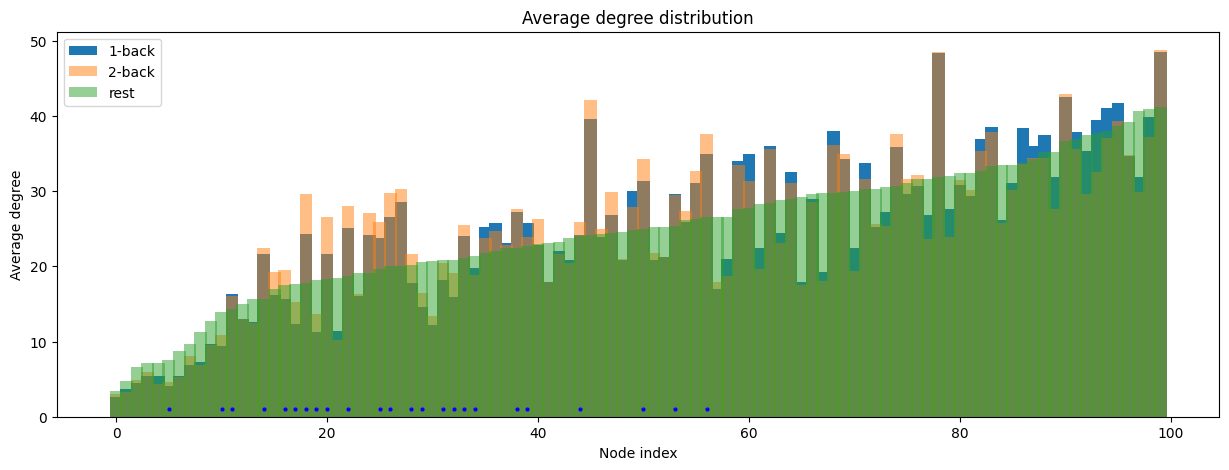

In [823]:
plt.figure(figsize=(15,5))
plt.bar(regions_degrees_sort.index, height=regions_degrees_sort['one_avg_degree'], width=1.2)
plt.bar(regions_degrees_sort.index, height=regions_degrees_sort['two_avg_degree'], alpha=0.5, width=1.2)#np.sort(two_avg_degree)
plt.bar(regions_degrees_sort.index, height=regions_degrees_sort['rest_avg_degree'], alpha=0.5, width=1.2)#np.sort(rest_avg_degree)

plt.legend(('1-back', '2-back', 'rest'))
# for i in regions_degrees_sort['ROI Label']:
#     if i in dmn_indexes:
plt.plot(indexy, [1 for x in range(24)], 'bo', markersize=2)
plt.title('Average degree distribution')
plt.xlabel('Node index')
plt.ylabel('Average degree')
plt.savefig('avg_degree_dist')

# Clustering Coefficient

## 0.25 threshold

In [110]:
rest_coef = np.zeros((40, 100))
one_coef = np.zeros((40, 100))
two_coef = np.zeros((40, 100))

In [111]:
for sub in range(subs.shape[0]):
    one_coef[sub] = bct.clustering_coef_bu(one_back_corr_bin[sub])
    two_coef[sub] = bct.clustering_coef_bu(two_back_corr_bin[sub])
    rest_coef[sub] = bct.clustering_coef_bu(rest_corr_bin[sub])

In [699]:
rest_coef_mean = np.mean(rest_coef, axis=0)
one_coef_mean = np.mean(one_coef, axis=0)
two_coef_mean = np.mean(two_coef, axis=0)


In [758]:
regions_coefs = regions
regions_coefs['one_avg_coef'] = one_coef_mean
regions_coefs['two_avg_coef'] = two_coef_mean
regions_coefs['rest_avg_coef'] = rest_coef_mean

In [834]:
regions_coefs_sort = regions_coefs.sort_values('rest_avg_coef')

In [ ]:
regions_coefs_sort = regions_coefs_sort.reset_index(drop=True)
print(regions_coefs_sort.to_string())

In [ ]:
indexy = regions_coefs_sort[regions_coefs_sort['ROI Name'].str.contains('Default')].index.to_list()
indexy

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(regions_coefs_sort.index, height=regions_coefs_sort['one_avg_coef'], width=1.2)
plt.bar(regions_coefs_sort.index, height=regions_coefs_sort['two_avg_coef'], alpha=0.5, width=1.2)#np.sort(two_avg_degree)
plt.bar(regions_coefs_sort.index, height=regions_coefs_sort['rest_avg_coef'], alpha=0.5, width=1.2)#np.sort(rest_avg_degree)

plt.legend(('1-back', '2-back', 'rest'))
# for i in regions_degrees_sort['ROI Label']:
#     if i in dmn_indexes:
plt.plot(indexy, [0.1 for x in range(24)], 'bo', markersize=2)
plt.title('Average clustering coefficient distribution')
plt.xlabel('Node index')
plt.ylabel('Average clustering coefficienct')
plt.savefig('avg_clustering_dist')

In [847]:
clust_anova = scipy.stats.f_oneway(rest_coef_mean, one_coef_mean, two_coef_mean)
clust_tukey = scipy.stats.tukey_hsd(rest_coef_mean, one_coef_mean, two_coef_mean)

In [ ]:
print(clust_anova, clust_tukey)

In [693]:
rest_coef_df = pd.DataFrame(rest_coef)

In [ ]:
rest_coef_df.describe()

In [ ]:
two_coef[1]

In [ ]:
rest_coef[1]

## 0.50 threshold

In [113]:
rest_coef_50 = np.zeros((40, 100))
one_coef_50 = np.zeros((40, 100))
two_coef_50 = np.zeros((40, 100))

In [114]:
for sub in range(subs.shape[0]):
    one_coef_50[sub] = bct.clustering_coef_bu(one_back_corr_bin_50[sub,:,:])
    two_coef_50[sub] = bct.clustering_coef_bu(two_back_corr_bin_50[sub,:,:])
    rest_coef_50[sub] = bct.clustering_coef_bu(rest_corr_bin_50[sub,:,:])

In [115]:
one_coef[1]

array([0.        , 0.87012987, 0.86956522, 0.78181818, 0.71397849,
       0.75333333, 0.64904863, 0.9047619 , 0.975     , 0.8047619 ,
       0.97222222, 0.65615616, 0.6951567 , 0.85454545, 0.58170732,
       0.50546448, 0.8       , 0.67820513, 0.73333333, 0.68589744,
       0.8       , 0.63838384, 0.68556005, 0.67015099, 0.        ,
       0.65719697, 0.53360608, 0.56910569, 0.58776596, 0.93464052,
       1.        , 0.        , 0.        , 0.66341463, 0.81521739,
       0.54856744, 0.9       , 0.33333333, 0.73076923, 0.5772549 ,
       0.57478992, 0.66666667, 0.74242424, 0.52380952, 0.        ,
       0.66666667, 0.70153846, 1.        , 0.64      , 0.66666667,
       0.        , 0.49678551, 0.60511034, 0.61097561, 0.59710145,
       0.82631579, 0.66218487, 0.91052632, 0.57478992, 0.68505747,
       0.70655271, 1.        , 0.7047619 , 0.66666667, 0.8       ,
       0.69846154, 0.55136268, 0.75692308, 0.65005537, 0.55325815,
       0.76679842, 0.62512077, 0.59389454, 0.67989418, 0.67943

In [116]:
one_coef_50[1]

array([0.6       , 0.76596737, 0.89882353, 0.87298387, 0.80370873,
       0.89333333, 0.81211589, 0.93846154, 0.97419355, 0.81706604,
       0.91362126, 0.8679135 , 0.88098694, 0.90147783, 0.7637827 ,
       0.65401987, 0.88235294, 0.78473998, 0.86363636, 0.78136646,
       0.94827586, 0.77973396, 0.83365385, 0.82270466, 0.73333333,
       0.85245902, 0.71561772, 0.76740443, 0.74527953, 0.861464  ,
       1.        , 0.5       , 1.        , 0.82539683, 0.85480944,
       0.76342096, 0.70899471, 0.44923077, 0.92753623, 0.8057971 ,
       0.67656012, 0.88383838, 0.76190476, 0.7       , 0.87272727,
       0.78205128, 0.81694915, 0.86666667, 0.67205387, 0.87878788,
       0.53571429, 0.64601262, 0.65076274, 0.71387387, 0.76934469,
       0.86565657, 0.76875   , 0.95079365, 0.71042618, 0.81057692,
       0.81920904, 0.87294118, 0.87953556, 0.91591592, 0.93073593,
       0.80701754, 0.71728272, 0.87003367, 0.83389831, 0.7563964 ,
       0.85858586, 0.78772379, 0.77763975, 0.84769963, 0.81845

# Centrality

## Betweenness centrality
* Ewentualnie do normalizacji

In [121]:
rest_betw = np.zeros((40, 100))
one_betw = np.zeros((40, 100))
two_betw= np.zeros((40, 100))

for sub in range(subs.shape[0]):
    one_betw[sub] = bct.betweenness_bin(one_back_corr_bin[sub])
    two_betw[sub] = bct.betweenness_bin(two_back_corr_bin[sub])
    rest_betw[sub] = bct.betweenness_bin(rest_corr_bin[sub])

In [317]:
rest_betw[1]

array([  4.18424834, 103.08874101,  82.92865523, 171.98730642,
       225.54896488,  67.83127665, 140.74961284,  48.95962492,
       227.71750023, 162.533898  ,   0.        ,  79.34553846,
        10.95341678, 270.42568321,  27.01895665, 217.98733903,
        17.92379428,  75.33939905,  28.55173627, 191.40489588,
        21.56862117, 112.53261031,  73.83485322,  37.05435348,
        12.09610902,  25.80937584, 206.75037014,  24.62199657,
       134.88101733,  36.05920132,   0.        ,   1.92726732,
        79.22501535,  19.5811879 , 120.15019706,  97.74237083,
        13.27704969, 477.80306581,  77.54416527, 166.25989116,
       178.32305141,  90.86875934, 149.25549578,   6.01670428,
       318.25822853,  88.81578088,  82.54638334,  14.94586838,
        58.35099761,  56.46882101,  33.82017981, 179.38493716,
       364.08042233, 441.47189901, 366.20970685, 135.47441241,
        68.26585979,  90.86645829, 216.48483364,  11.56858962,
        97.86995441,   1.37982341, 111.48965876,  58.45

## Flow coefficient (do opisania w thesis)

In [140]:
rest_flow = np.zeros((40, 100))
one_flow = np.zeros((40, 100))
two_flow = np.zeros((40, 100))

one_flow_avg = np.zeros(40)
two_flow_avg = np.zeros(40)
rest_flow_avg = np.zeros(40)

one_total_flow = np.zeros((40, 100), dtype='int')
two_total_flow = np.zeros((40, 100), dtype='int')
rest_total_flow = np.zeros((40, 100), dtype='int')

for sub in range(subs.shape[0]):
    one_flow[sub], one_flow_avg[sub], one_total_flow[sub] = bct.flow_coef_bd(one_back_corr_bin[sub])
    two_flow[sub], two_flow_avg[sub], two_total_flow[sub] = bct.flow_coef_bd(two_back_corr_bin[sub])
    rest_flow[sub], rest_flow_avg[sub], rest_total_flow[sub] = bct.flow_coef_bd(rest_corr_bin[sub])

In [139]:
one_total_flow

(40, 100)

# Ewentualnie do policzenia - module degree z_score

In [192]:
rest_mod_z = np.zeros((40, 100))
one_mod_z = np.zeros((40, 100))
two_mod_z = np.zeros((40, 100))

for sub in range(subs.shape[0]):
    one_mod_z[sub] = bct.module_degree_zscore(one_back_corr_bin[sub], one_louvain[sub])
    two_mod_z[sub] = bct.module_degree_zscore(two_back_corr_bin[sub], two_louvain[sub])
    rest_mod_z[sub] = bct.module_degree_zscore(rest_corr_bin[sub], rest_louvain[sub])

In [ ]:
one_mod_z[3]

# Participation coef - potrzebny community affiliation vector

In [198]:
rest_part_coef = np.zeros((40, 100))
one_part_coef = np.zeros((40, 100))
two_part_coef = np.zeros((40, 100))

for sub in range(subs.shape[0]):
    one_part_coef[sub] = bct.participation_coef(one_back_corr_bin[sub], one_louvain[sub])
    two_part_coef[sub] = bct.participation_coef(two_back_corr_bin[sub], two_louvain[sub])
    rest_part_coef[sub] = bct.participation_coef(rest_corr_bin[sub], rest_louvain[sub])

In [866]:
rest_part_coef.shape

(40, 100)

In [868]:
rest_part_mean = np.mean(rest_part_coef, axis=0)
one_part_mean = np.mean(one_part_coef, axis=0)
two_part_mean = np.mean(two_part_coef, axis=0)

In [875]:
regions_part = regions
regions_part['one_avg_coef'] = one_part_mean
regions_part['two_avg_coef'] = two_part_mean
regions_part['rest_avg_coef'] = rest_part_mean

In [876]:
regions_part_sort = regions_part.sort_values('rest_avg_coef')

In [ ]:
regions_part_sort = regions_part_sort.reset_index(drop=True)
print(regions_part_sort.to_string())

In [878]:
indexy = regions_part_sort[regions_part_sort['ROI Name'].str.contains('Default')].index.to_list()
# indexy

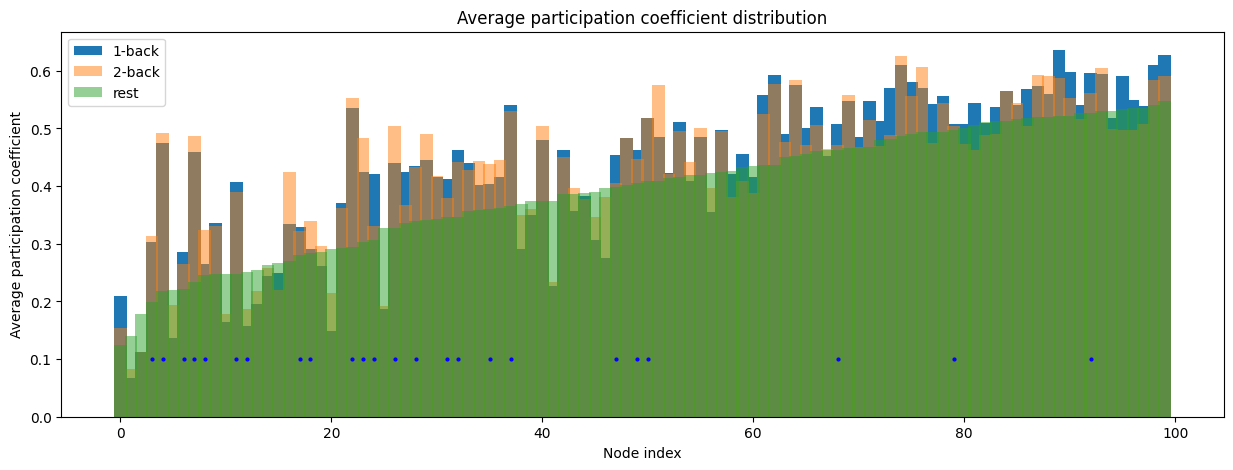

In [879]:
plt.figure(figsize=(15,5))
plt.bar(regions_part_sort.index, height=regions_part_sort['one_avg_coef'], width=1.2)
plt.bar(regions_part_sort.index, height=regions_part_sort['two_avg_coef'], alpha=0.5, width=1.2)#np.sort(two_avg_degree)
plt.bar(regions_part_sort.index, height=regions_part_sort['rest_avg_coef'], alpha=0.5, width=1.2)#np.sort(rest_avg_degree)

plt.legend(('1-back', '2-back', 'rest'))
# for i in regions_degrees_sort['ROI Label']:
#     if i in dmn_indexes:
plt.plot(indexy, [0.1 for x in range(24)], 'bo', markersize=2)
plt.title('Average participation coefficient distribution')
plt.xlabel('Node index')
plt.ylabel('Average participation coefficient')
plt.savefig('avg_participation_coefficient')

In [880]:
part_anova = scipy.stats.f_oneway(rest_part_mean, one_part_mean, two_part_mean)
part_tukey = scipy.stats.tukey_hsd(rest_part_mean, one_part_mean, two_part_mean)

In [881]:
print(part_anova, part_tukey)

F_onewayResult(statistic=4.0641776833592544, pvalue=0.018141422817576473) Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.043     0.031    -0.083    -0.003
 (0 - 2)     -0.041     0.046    -0.081    -0.001
 (1 - 0)      0.043     0.031     0.003     0.083
 (1 - 2)      0.003     0.987    -0.037     0.043
 (2 - 0)      0.041     0.046     0.001     0.081
 (2 - 1)     -0.003     0.987    -0.043     0.037



# rich_club_bu

In [219]:
rest_rich_R = np.zeros(57, dtype='object')
one_rich_R = np.zeros(57, dtype='object')
two_rich_R = np.zeros(57, dtype='object')

rest_rich_Nk = np.zeros(40, dtype='object')
one_rich_Nk = np.zeros(40, dtype='object')
two_rich_Nk = np.zeros(40, dtype='object')

rest_rich_Ek = np.zeros(40, dtype='object')
one_rich_Ek = np.zeros(40, dtype='object')
two_rich_Ek = np.zeros(40, dtype='object')

In [221]:
for sub in range(subs.shape[0]):
    one_rich_R[sub], one_rich_Nk[sub], one_rich_Ek[sub] = bct.rich_club_bu(one_back_corr_bin[sub])
    two_rich_R[sub], two_rich_Nk[sub], two_rich_Ek[sub] = bct.rich_club_bu(two_back_corr_bin[sub])
    rest_rich_R[sub], rest_rich_Nk[sub], rest_rich_Ek[sub] = bct.rich_club_bu(rest_corr_bin[sub])

In [222]:
rest_rich_R[1]

array([0.25010101, 0.25479283, 0.26417526, 0.26907895, 0.28447873,
       0.30012484, 0.30012484, 0.30012484, 0.3046476 , 0.31846785,
       0.32352941, 0.33785005, 0.34228395, 0.3471519 , 0.36363636,
       0.38584475, 0.40207039, 0.44345238, 0.5037594 , 0.53529001,
       0.57882353, 0.60629252, 0.63552266, 0.64541063, 0.67171717,
       0.68181818, 0.74110953, 0.77327327, 0.80840336, 0.81996435,
       0.82386364, 0.8516129 , 0.86896552, 0.89417989, 0.92022792,
       0.92333333, 0.98245614, 0.98245614, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
              nan,        nan,        nan])

# characteristic path length
* needs distance first

## distance

In [236]:
rest_dist = np.zeros((40, 100, 100))#, dtype='object')
one_dist = np.zeros((40, 100, 100))# dtype='object')
two_dist = np.zeros((40, 100, 100))# dtype='object')

for sub in range(subs.shape[0]):
    one_dist[sub] = bct.distance_bin(one_back_corr_bin[sub])
    two_dist[sub] = bct.distance_bin(two_back_corr_bin[sub])
    rest_dist[sub] = bct.distance_bin(rest_corr_bin[sub])

In [239]:
rest_dist[1]

array([[0., 3., 3., ..., 3., 4., 3.],
       [3., 0., 1., ..., 2., 2., 3.],
       [3., 1., 0., ..., 3., 2., 3.],
       ...,
       [3., 2., 3., ..., 0., 2., 1.],
       [4., 2., 2., ..., 2., 0., 1.],
       [3., 3., 3., ..., 1., 1., 0.]])

In [330]:
rest_char = np.empty(40, dtype='object') #lambda(charpath)*efficiency*ecc(Nx1)*radius*diameter
one_char = np.empty(40, dtype='object')
two_char = np.empty(40, dtype='object')

for sub in range(subs.shape[0]):
    one_char[sub] = bct.charpath(one_dist[sub])
    two_char[sub] = bct.charpath(two_dist[sub])
    rest_char[sub] = bct.charpath(rest_dist[sub])

In [331]:
rest_char[1][0] # this is the lambda - char. path. length

2.092323232323232

In [335]:
rest_char[1][1] # this is the global efficiency

0.5723434343434344

In [333]:
rest_e_glob = np.empty(40, dtype='float') 
one_e_glob = np.empty(40)
two_e_glob = np.empty(40)
for sub in range(subs.shape[0]):
    rest_e_glob[sub] = rest_char[sub][1]
    one_e_glob[sub] = one_char[sub][1]
    two_e_glob[sub] = two_char[sub][1]

In [336]:
rest_e_glob[1]

0.5723434343434344

# efficiency - local (global was already computed in the char. path. length funciton)

In [256]:
rest_e_loc = np.empty((40,100), dtype='object') #output is Nx1 np.ndarray
one_e_loc = np.empty((40,100), dtype='object')
two_e_loc = np.empty((40,100), dtype='object')

for sub in range(subs.shape[0]):
    one_e_loc[sub] = bct.efficiency_bin(one_back_corr_bin[sub], local=True)
    two_e_loc[sub] = bct.efficiency_bin(two_back_corr_bin[sub], local=True)
    rest_e_loc[sub] = bct.efficiency_bin(rest_corr_bin[sub], local=True)

In [849]:
rest_e_loc.shape

(40, 100)

In [850]:
rest_e_loc_mean = np.mean(rest_e_loc, axis=0)
one_e_loc_mean = np.mean(one_e_loc, axis=0)
two_e_loc_mean = np.mean(two_e_loc, axis=0)

In [852]:
regions_e_loc = regions
regions_e_loc['one_avg_coef'] = one_e_loc_mean
regions_e_loc['two_avg_coef'] = two_e_loc_mean
regions_e_loc['rest_avg_coef'] = rest_e_loc_mean

In [ ]:
regions_e_loc

In [854]:
regions_e_loc_sort = regions_e_loc.sort_values('rest_avg_coef')

In [ ]:
regions_e_loc_sort = regions_e_loc_sort.reset_index(drop=True)
print(regions_coefs_sort.to_string())

In [865]:
regions_e_loc_sort.iloc[3]

ROI Label                                    80
ROI Name         7Networks_RH_Limbic_TempPole_1
R                                            38
A                                             0
S                                           -38
one_avg_coef                           0.393526
two_avg_coef                           0.392869
rest_avg_coef                           0.59951
Name: 3, dtype: object

In [857]:
indexy = regions_e_loc_sort[regions_e_loc_sort['ROI Name'].str.contains('Default')].index.to_list()
# indexy

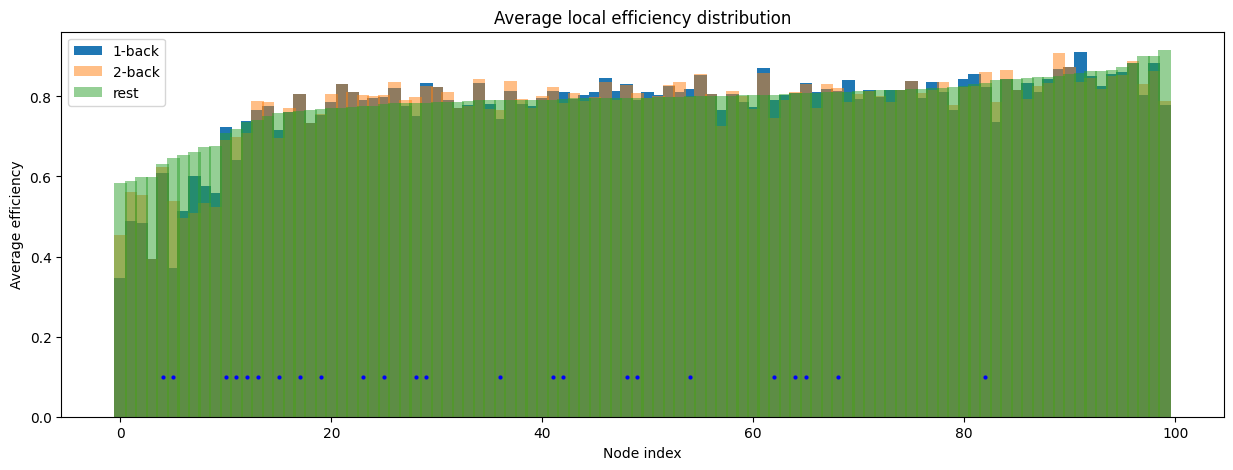

In [860]:
plt.figure(figsize=(15,5))
plt.bar(regions_e_loc_sort.index, height=regions_e_loc_sort['one_avg_coef'], width=1.2)
plt.bar(regions_e_loc_sort.index, height=regions_e_loc_sort['two_avg_coef'], alpha=0.5, width=1.2)#np.sort(two_avg_degree)
plt.bar(regions_e_loc_sort.index, height=regions_e_loc_sort['rest_avg_coef'], alpha=0.5, width=1.2)#np.sort(rest_avg_degree)

plt.legend(('1-back', '2-back', 'rest'))
# for i in regions_degrees_sort['ROI Label']:
#     if i in dmn_indexes:
plt.plot(indexy, [0.1 for x in range(24)], 'bo', markersize=2)
plt.title('Average local efficiency distribution')
plt.xlabel('Node index')
plt.ylabel('Average efficiency')
plt.savefig('avg_local_efficiency')

# Louvain community - modularity
* commented because louvain mod. changes a bit on every run

## Binary thresholded for 25% density

In [190]:
# rest_louvain = np.zeros((40, 100), dtype='int')
# one_louvain = np.zeros((40, 100), dtype='int')
# two_louvain = np.zeros((40, 100), dtype='int')

# rest_louvain_q = np.zeros(40)
# one_louvain_q = np.zeros(40)
# two_louvain_q = np.zeros(40)

# for sub in range(subs.shape[0]):
    # one_louvain[sub], one_louvain_q[sub] = bct.community_louvain(one_back_corr_bin[sub])
    # two_louvain[sub], two_louvain_q[sub] = bct.community_louvain(two_back_corr_bin[sub])
    # rest_louvain[sub], rest_louvain_q[sub] = bct.community_louvain(rest_corr_bin[sub])

In [393]:
print(one_louvain_q[1],two_louvain_q[1],rest_louvain_q[1])

0.20929778865803145 0.19761862506883526 0.29148354086141337


Text(0.5, 1.0, 'Modularity q-statistic')

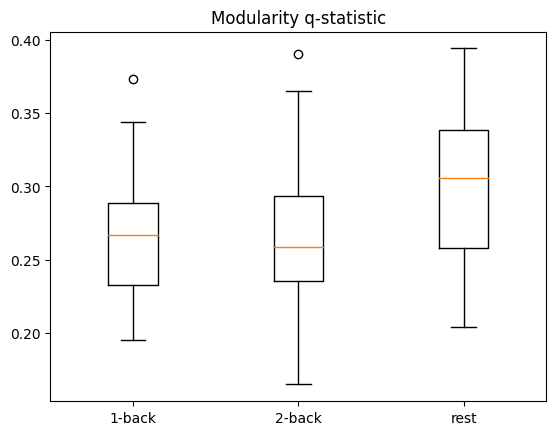

In [392]:
data = [one_louvain_q, two_louvain_q, rest_louvain_q]
labels = ['1-back', '2-back', 'rest']
plt.boxplot(data, labels=labels, meanline=True);
plt.title('Modularity q-statistic')

## Binary thresholded for 50% density

In [268]:
rest_louvain_50 = np.zeros((40, 100), dtype='int')
one_louvain_50 = np.zeros((40, 100), dtype='int')
two_louvain_50 = np.zeros((40, 100), dtype='int')

rest_louvain_q_50 = np.zeros(40)
one_louvain_q_50 = np.zeros(40)
two_louvain_q_50 = np.zeros(40)

for sub in range(subs.shape[0]):
    one_louvain_50[sub], one_louvain_q_50[sub] = bct.community_louvain(one_back_corr_bin_50[sub])
    two_louvain_50[sub], two_louvain_q_50[sub] = bct.community_louvain(two_back_corr_bin_50[sub])
    rest_louvain_50[sub], rest_louvain_q_50[sub] = bct.community_louvain(rest_corr_bin_50[sub])

In [269]:
print(one_louvain_q_50[1],two_louvain_q_50[1],rest_louvain_q_50[1])

0.11123493521069278 0.09177390062238545 0.21023977145189268


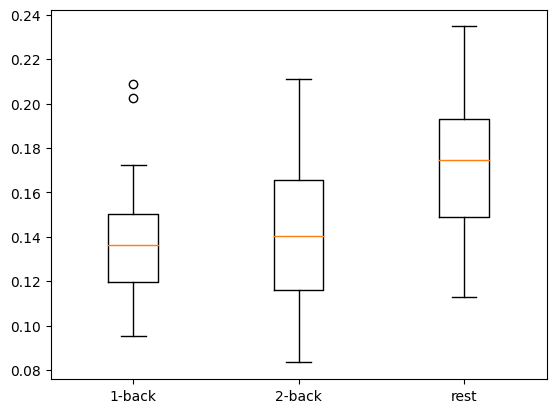

In [270]:
data = [one_louvain_q_50, two_louvain_q_50, rest_louvain_q_50]
labels = ['1-back', '2-back', 'rest']
plt.boxplot(data, labels=labels, meanline=True);

In [277]:
mean_q_one_50 = np.mean(one_louvain_q_50)
mean_q_two_50 = np.mean(two_louvain_q_50)
mean_q_rest_50 = np.mean(rest_louvain_q_50)
print(mean_q_one_50, mean_q_two_50, mean_q_rest_50)

0.13715642893582286 0.14148729925517806 0.17149738189980615


## Mean modularity

In [271]:
one_louvain_q.shape

(40,)

In [273]:
mean_q_one = np.mean(one_louvain_q)
mean_q_two = np.mean(two_louvain_q)
mean_q_rest = np.mean(rest_louvain_q)
print(mean_q_one, mean_q_two, mean_q_rest)

0.26370958454800986 0.269004878171317 0.2989637433741951


## Checking modularity in only thresholded (not binarized)

In [275]:
rest_louvain_thr = np.zeros((40, 100), dtype='int')
one_louvain_thr = np.zeros((40, 100), dtype='int')
two_louvain_thr = np.zeros((40, 100), dtype='int')

rest_louvain_q_thr = np.zeros(40)
one_louvain_q_thr = np.zeros(40)
two_louvain_q_thr = np.zeros(40)

for sub in range(subs.shape[0]):
    one_louvain_thr[sub], one_louvain_q_thr[sub] = bct.community_louvain(one_back_corr_thr[sub])
    two_louvain_thr[sub], two_louvain_q_thr[sub] = bct.community_louvain(two_back_corr_thr[sub])
    rest_louvain_thr[sub], rest_louvain_q_thr[sub] = bct.community_louvain(rest_corr_thr[sub])

In [276]:
mean_q_one_thr = np.mean(one_louvain_q_thr)
mean_q_two_thr = np.mean(two_louvain_q_thr)
mean_q_rest_thr = np.mean(rest_louvain_q_thr)
print(mean_q_one_thr, mean_q_two_thr, mean_q_rest_thr)

0.28599668107809645 0.2900423146808907 0.3281728683408912


## standard modularity (sth doesn't work in the function)

In [ ]:
one_mod = np.empty(100, dtype='object')
two_mod = np.empty(100, dtype='object')
rest_mod = np.empty(100, dtype='object')

for sub in range(subs.shape[0]):
    one_mod[sub] = bct.modularity_und(one_back_corr_bin[sub])
    two_mod[sub] = bct.modularity_und(two_back_corr_bin[sub])
    rest_mod[sub] = bct.modularity_und(rest_corr_bin[sub])

In [382]:
rest_corr_bin[0].shape

(100, 100)

In [ ]:
rest_mod = np.empty((40,100), dtype='object')
one_mod = np.empty((40,100), dtype='object')
two_mod = np.empty((40,100), dtype='object')

rest_mod_q = np.empty(40, dtype='object')
one_mod_q = np.empty(40, dtype='object')
two_mod_q = np.empty(40, dtype='object')

#rest_mod[0] = bct.modularity_und(rest_corr_bin[0])

# rest_mod_q = [x for x in range(100)]#np.zeros((40,1), dtype='float')
# one_mod_q = [x for x in range(100)]#np.zeros((40,1), dtype='float')
# two_mod_q = [x for x in range(100)]#np.zeros((40,1), dtype='float')

for sub in range(subs.shape[0]):
    print(sub)
    one_mod[sub], one_mod_q[sub] = bct.modularity_und(one_back_corr_bin[sub])
    two_mod[sub] = bct.modularity_und(two_back_corr_bin[sub])
    rest_mod[sub] = bct.modularity_und(rest_corr_bin[sub])

In [157]:
print(one_mod_q[1], two_mod_q[1], rest_mod_q[1])

0.20955583945130113 0.18803714365501709 0.3046692513068918


# makerandCIJ_und - for generating ranodm network - for comapring small-worldenss na przykład
* randmio_und may be better/easier to use

# Visualization in BTC !!!

## reoreder_mat
## reorder mod 

# statistical tests 

## testing assumptions for ANOVA

In [308]:
def check_before_anova(rest, one_back, two_back):
    #test shapiro-wilka na normalność rozkładu
    results_shapiro_rest = scipy.stats.shapiro(rest)
    results_shapiro_one_back = scipy.stats.shapiro(one_back)
    results_shapiro_two_back = scipy.stats.shapiro(two_back)
    

    #test levena na równość wariancji
    results_levene = scipy.stats.levene(rest, one_back, two_back)
    
    return results_shapiro_rest, results_shapiro_one_back, results_shapiro_two_back, results_levene
    
    

## Modularity
- Tested with one way repeated measures ANOVA and post-hoc with Tukey's HSD
- ANOVA: F = 6.44, p = 0.002
- Tukey's HSD: Modularity is significantly different comparing 1-back and 2-back against rest, but 1-back and 2-back do not difer significantly. (F1(rest vs 1-back)=0.035, p1 = 0.003; F2(rest vs 2-back)=0.030, p2=0.015; F3(1-back vs 2-back)=0.05, p3 = 0.872)

In [337]:
check_mod = check_before_anova(rest_louvain_q, one_louvain_q, two_louvain_q)

In [338]:
check_mod

(ShapiroResult(statistic=0.9788642525672913, pvalue=0.6474137902259827),
 ShapiroResult(statistic=0.9730982184410095, pvalue=0.4485621154308319),
 ShapiroResult(statistic=0.9744827747344971, pvalue=0.49277928471565247),
 LeveneResult(statistic=0.4671708288933817, pvalue=0.6279370676336209))

### One-way within-subjects (repeated measures) ANOVA

In [314]:
mod_anova = scipy.stats.f_oneway(rest_louvain_q, one_louvain_q, two_louvain_q)
mod_tukey = scipy.stats.tukey_hsd(rest_louvain_q, one_louvain_q, two_louvain_q)

In [315]:
print(mod_anova, mod_tukey)

F_onewayResult(statistic=6.438526083452397, pvalue=0.0022244680691706634) Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.035     0.003     0.010     0.060
 (0 - 2)      0.030     0.015     0.005     0.055
 (1 - 0)     -0.035     0.003    -0.060    -0.010
 (1 - 2)     -0.005     0.872    -0.030     0.020
 (2 - 0)     -0.030     0.015    -0.055    -0.005
 (2 - 1)      0.005     0.872    -0.020     0.030



## Global efficiency

- does not have normal distribution
- medians do not significantly differ, meaning that there is possibility that global efficiencies for every condition are similiar.

In [339]:
check_e_glob = check_before_anova(rest_e_glob, one_e_glob, two_e_glob)
check_e_glob

(ShapiroResult(statistic=0.8664836883544922, pvalue=0.00023204635363072157),
 ShapiroResult(statistic=0.9058431386947632, pvalue=0.0028402989264577627),
 ShapiroResult(statistic=0.87566077709198, pvalue=0.0004028760304208845),
 LeveneResult(statistic=0.8255357186324832, pvalue=0.44053513320833626))

(array([ 1.,  0.,  1.,  1.,  1.,  3.,  5.,  8., 11.,  9.]),
 array([0.49861953, 0.50902525, 0.51943098, 0.5298367 , 0.54024242,
        0.55064815, 0.56105387, 0.5714596 , 0.58186532, 0.59227104,
        0.60267677]),
 <BarContainer object of 10 artists>)

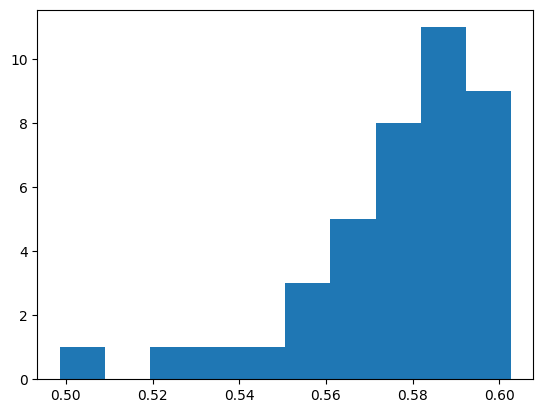

In [340]:
plt.hist(rest_e_glob)

#### Testign kruskal test for media, because distributions are not normal

In [342]:
e_global_kruskal = scipy.stats.kruskal(rest_e_glob, one_e_glob, two_e_glob)
e_global_kruskal

KruskalResult(statistic=3.8038561839578815, pvalue=0.1492805150025818)